In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

from tensorflow.keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input((28,28))
x = Flatten()(input_layer)
x = Dense(128, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

model.compile(optimizer='sgd',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

loss, accuracy = model.evaluate(x_test, y_test)

predictions = model.predict(x_test)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0885 - accuracy: 0.2371
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0784 - accuracy: 0.4815
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.6264
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.6970
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.7793
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.8222
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0313 - accuracy: 0.8389
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - accuracy: 0.8511
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0258 - accuracy: 0.8601
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


In [2]:
def plot_image(i,predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

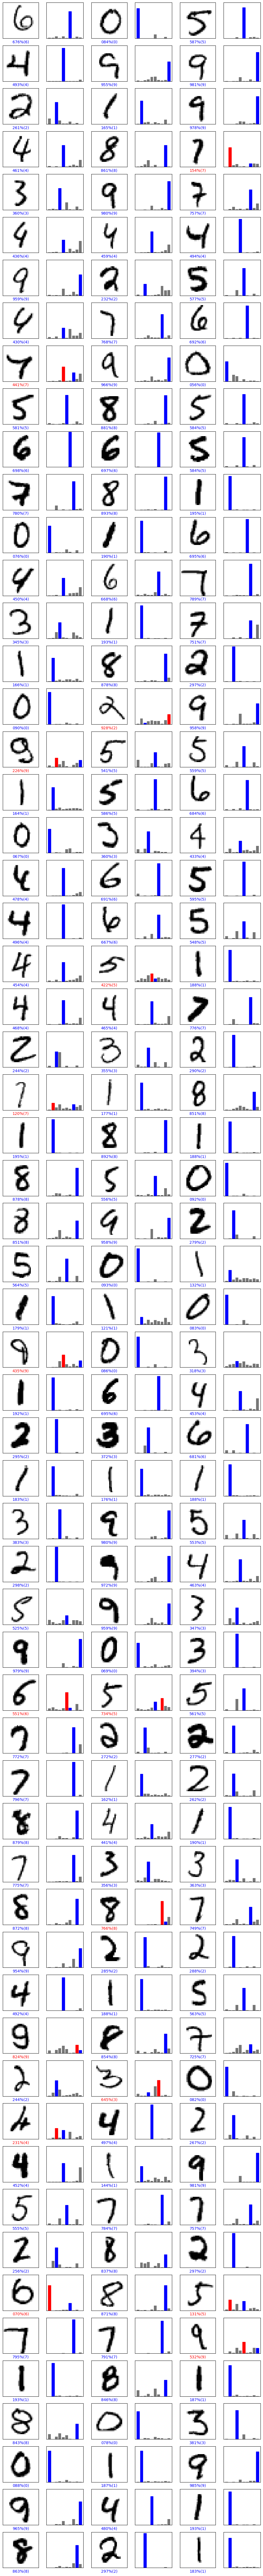

In [3]:
num_rows = 60
num_cols = 3
num_images = num_rows * num_cols

start_index = 100
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+start_index, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+start_index, predictions, test_labels)

plt.show()